Dataset Preview:
    MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  

--- Simple Linear Regression (Feature: MedInc) ---
R² Score: 0.459
MAE: 0.630
MSE: 0.709


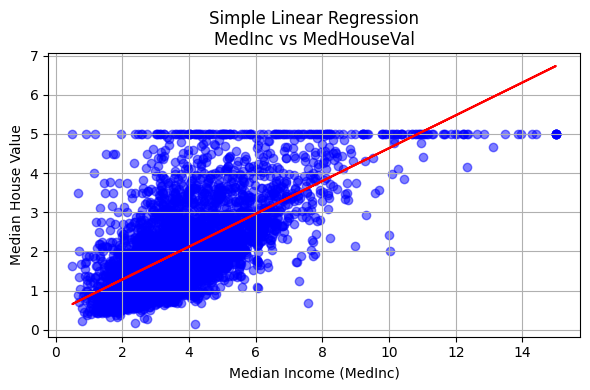


--- Multiple Linear Regression (All Features) ---
R² Score: 0.576
MAE: 0.533
MSE: 0.556

Model Coefficients:
            Coefficient
MedInc         0.448675
HouseAge       0.009724
AveRooms      -0.123323
AveBedrms      0.783145
Population    -0.000002
AveOccup      -0.003526
Latitude      -0.419792
Longitude     -0.433708


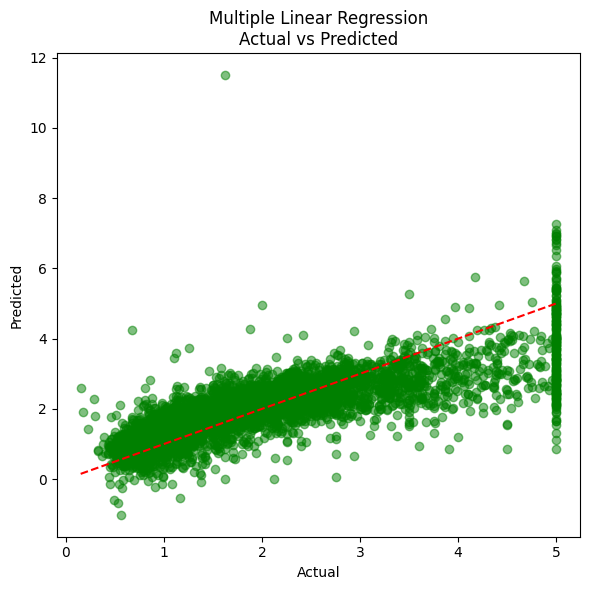

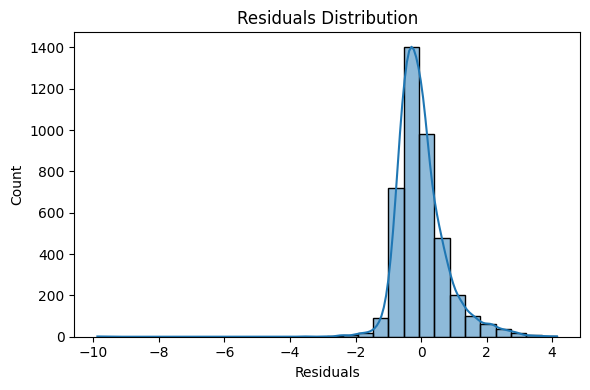

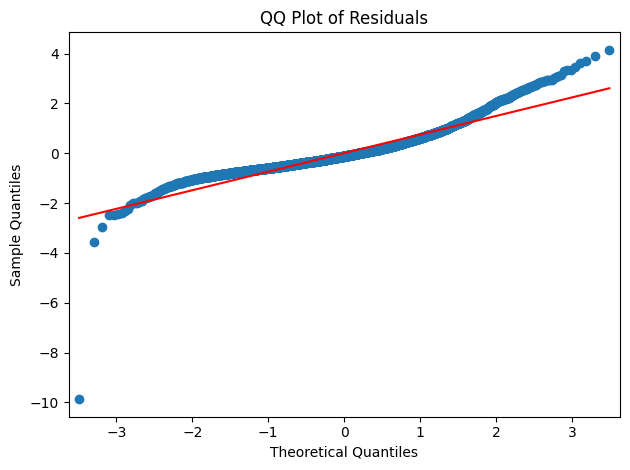

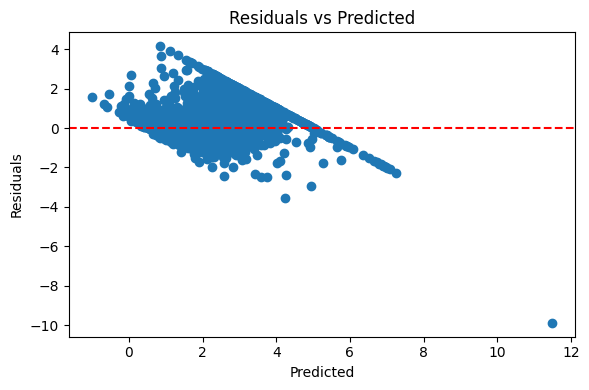


Variance Inflation Factor (VIF):
      Feature       VIF
0      MedInc  2.501295
1    HouseAge  1.241254
2    AveRooms  8.342786
3   AveBedrms  6.994995
4  Population  1.138125
5    AveOccup  1.008324
6    Latitude  9.297624
7   Longitude  8.962263

✅ Multiple Linear Regression model saved as 'linear_regression_model.pkl'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import statsmodels.api as sm
from scipy import stats

from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load dataset
housing = fetch_california_housing()
df = pd.DataFrame(housing.data, columns=housing.feature_names)
df['MedHouseVal'] = housing.target

print("Dataset Preview:\n", df.head())

# --------- SIMPLE LINEAR REGRESSION (Single Feature: MedInc) ---------
print("\n--- Simple Linear Regression (Feature: MedInc) ---")

X_simple = df[['MedInc']]
y = df['MedHouseVal']
X_train_s, X_test_s, y_train_s, y_test_s = train_test_split(X_simple, y, test_size=0.2, random_state=42)

model_simple = LinearRegression()
model_simple.fit(X_train_s, y_train_s)
y_pred_s = model_simple.predict(X_test_s)

# Evaluate
print(f"R² Score: {r2_score(y_test_s, y_pred_s):.3f}")
print(f"MAE: {mean_absolute_error(y_test_s, y_pred_s):.3f}")
print(f"MSE: {mean_squared_error(y_test_s, y_pred_s):.3f}")

# Plot
plt.figure(figsize=(6, 4))
plt.scatter(X_test_s, y_test_s, color='blue', alpha=0.5)
plt.plot(X_test_s, y_pred_s, color='red')
plt.title("Simple Linear Regression\nMedInc vs MedHouseVal")
plt.xlabel("Median Income (MedInc)")
plt.ylabel("Median House Value")
plt.grid(True)
plt.tight_layout()
plt.show()

# --------- MULTIPLE LINEAR REGRESSION (All Features) ---------
print("\n--- Multiple Linear Regression (All Features) ---")

X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model_multi = LinearRegression()
model_multi.fit(X_train, y_train)
y_pred = model_multi.predict(X_test)

# Evaluate
print(f"R² Score: {r2_score(y_test, y_pred):.3f}")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.3f}")
print(f"MSE: {mean_squared_error(y_test, y_pred):.3f}")

# Coefficients
print("\nModel Coefficients:")
print(pd.DataFrame(model_multi.coef_, X.columns, columns=["Coefficient"]))

# Plot Actual vs Predicted
plt.figure(figsize=(6, 6))
plt.scatter(y_test, y_pred, alpha=0.5, color='green')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title("Multiple Linear Regression\nActual vs Predicted")
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.tight_layout()
plt.show()

# Residuals
residuals = y_test - y_pred
plt.figure(figsize=(6, 4))
sns.histplot(residuals, kde=True, bins=30)
plt.title("Residuals Distribution")
plt.xlabel("Residuals")
plt.tight_layout()
plt.show()

# QQ Plot for residuals
sm.qqplot(residuals, line='s')
plt.title("QQ Plot of Residuals")
plt.tight_layout()
plt.show()

# Residuals vs Predicted
plt.figure(figsize=(6, 4))
plt.scatter(y_pred, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals vs Predicted")
plt.xlabel("Predicted")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()

# Multicollinearity (VIF)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]
print("\nVariance Inflation Factor (VIF):")
print(vif_data)

# Save the model
joblib.dump(model_multi, "linear_regression_model.pkl")
print("\n✅ Multiple Linear Regression model saved as 'linear_regression_model.pkl'")
